In [1]:
import pandas as pd 
import numpy as np
import re, io, base64
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
name = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/name_basics.tsv', sep = "\t", header = 0)
basics = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/title_basics.tsv', sep = "\t", header = 0)
ratings = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/title_ratings.tsv', sep = "\t", header = 0)
# akas = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/title_akas.tsv', sep = "\t", header = 0)
# crew = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/title_crew.tsv', sep = "\t", header = 0)
# episode = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/title_episode.tsv', sep = "\t", header = 0)
# principals = pd.read_csv('D:/Study/MSIT/2nd Year/DataScience_2019501007/Data Analytics and Data Visualisation/Task - 1/IMDB Data/title_principals.tsv', sep = "\t", header = 0)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
temp_basics = basics[basics["startYear"] != "\\N"]
temp_basics = temp_basics.astype({"startYear":"int"})
print(temp_basics.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int32
endYear           object
runtimeMinutes    object
genres            object
dtype: object


In [4]:
sol = pd.merge(temp_basics, ratings, on = "tconst")
print(sol.head())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult  startYear endYear runtimeMinutes                    genres  \
0       0       1894      \N              1         Documentary,Short   
1       0       1892      \N              5           Animation,Short   
2       0       1892      \N              4  Animation,Comedy,Romance   
3       0       1892      \N             12           Animation,Short   
4       0       1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.7      1669  
1            6.1       207  
2            6.5      1392  


# To Find the 20 most popular movies with a rank more than 8.0

In [5]:
temp_result = sol[(sol['averageRating'] > 8.0) & (sol["titleType"] == 'movie')]
result = temp_result.sort_values(by = 'numVotes', ascending = False)
result.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
81773,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2326344
246038,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2288140
582013,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2051750
98054,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,1842531
81557,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1814425
80684,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,1795075
95969,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1664961
89544,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1649550
112866,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1632805
45695,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1607349


# To find the 20 best rated movies with over 40,000 votes in the 2000s (year >= 2000)

In [6]:
rated_movies = sol[(sol["numVotes"] >= 40000) & (sol["startYear"] >= 2000) & (sol["titleType"] == 'movie')]
res = rated_movies.sort_values(by = 'averageRating', ascending = False)
res.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
752672,tt2592910,movie,CM101MMXI Fundamentals,CM101MMXI Fundamentals,0,2013,\N,139,"Comedy,Documentary",9.2,43813
246038,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2288140
112866,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1632805
582013,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2051750
940296,tt5813916,movie,The Mountain II,Dag II,0,2016,\N,135,"Action,Drama,War",8.8,104744
89544,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1649550
445593,tt10189514,movie,Soorarai Pottru,Soorarai Pottru,0,2020,\N,153,Drama,8.7,51610
112867,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002,\N,179,"Action,Adventure,Drama",8.7,1476251
990094,tt6751668,movie,Parasite,Gisaengchung,0,2019,\N,132,"Comedy,Drama,Thriller",8.6,530801
183922,tt0317248,movie,City of God,Cidade de Deus,0,2002,\N,130,"Crime,Drama",8.6,696002


# Data Analysis
# Convert it into a CSV file

In [7]:
name.to_csv('name_basics.csv')
basics.to_csv('title_basics.csv')
ratings.to_csv('title_ratings.csv')
# akas.to_csv('title_akas.csv')
# principals.to_csv('title_principals.csv')
# crew.to_csv('title_crew.csv')
# episode.to_csv('title_episode.csv')

In [8]:
print(basics.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object


In [9]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [10]:
basics["runtimeMinutes"] = pd.to_numeric(basics["runtimeMinutes"], errors="coerce")
basics["startYear"] = pd.to_numeric(basics["startYear"], errors="coerce")
basics["endYear"] = pd.to_numeric(basics["endYear"], errors="coerce")
basics = basics.astype({"isAdult" : bool})

# Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [11]:
movies = sol[sol["titleType"] == "movie"]
movies_year_2000_2009 = movies[(movies["startYear"] >= 2000) & (movies["startYear"] <= 2009)]
movies_year_2000_2009 = movies_year_2000_2009.sort_values(by = ['averageRating','numVotes'], ascending = False)
print(movies_year_2000_2009.averageRating.iloc[0:9].mean())

9.7


# Find the year in the 1900s when the average rank increased the most, compared to theprevious year. (Ignore movies with votes < 1000)

In [12]:
movies_1900s = movies[(movies["startYear"] >= 1900) & (movies["startYear"] <= 2000)]
movies_1900s = movies_1900s[movies_1900s["numVotes"] >= 1000]
movies_1900s = movies_1900s.sort_values(by="startYear")
movies_1900s.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
989,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2334
1182,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,1976
1217,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1369
1238,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1071
1278,tt0003419,movie,The Student of Prague,Der Student von Prag,0,1913,\N,85,"Drama,Fantasy,Horror",6.5,1823


In [13]:
movies_1900yearwise_total_avg_rank = movies_1900s.groupby(["startYear"]).mean()
movies_1900yearwise_total_avg_rank

,averageRating,numVotes
startYear,,
1911,7.000000,2334.000000
1913,6.875000,1559.750000
1914,6.560000,2000.200000
1915,6.760000,6278.800000
1916,6.950000,7842.000000
...,...,...
1996,6.327020,27433.621212
1997,6.416018,36579.432494
1998,6.425166,35897.688742


In [14]:
movies_1900yearwise_total_avg_rank["increased_rank"] = movies_1900yearwise_total_avg_rank["averageRating"] - movies_1900yearwise_total_avg_rank["averageRating"].shift(1)
movies_1900yearwise_total_avg_rank

,averageRating,numVotes,increased_rank
startYear,,,
1911,7.000000,2334.000000,NaN
1913,6.875000,1559.750000,-0.125000
1914,6.560000,2000.200000,-0.315000
1915,6.760000,6278.800000,0.200000
1916,6.950000,7842.000000,0.190000
...,...,...,...
1996,6.327020,27433.621212,-0.101287
1997,6.416018,36579.432494,0.088998
1998,6.425166,35897.688742,0.009147


In [15]:
movies_1900yearwise_total_avg_rank = movies_1900yearwise_total_avg_rank.sort_values(by="increased_rank",ascending=False)
movies_1900yearwise_total_avg_rank.head(1)

,averageRating,numVotes,increased_rank
startYear,,,
1962,7.083333,13506.621212,0.29023


# Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes <= 1000.)

In [16]:
movies_Votes_greater_1000 = movies[movies['numVotes'] >= 1000]
movies_yearwise_total_avg_rank = movies_Votes_greater_1000.groupby(["startYear"]).mean()
movies_yearwise_total_avg_rank.index

Int64Index([1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
            ...
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='startYear', length=109)

In [17]:
movies_yearwise_total_avg_rank.reset_index(level = 0, inplace = True)
movies_yearwise_total_avg_rank

,startYear,averageRating,numVotes
0,1911,7.000000,2334.000000
1,1913,6.875000,1559.750000
2,1914,6.560000,2000.200000
3,1915,6.760000,6278.800000
4,1916,6.950000,7842.000000
...,...,...,...
104,2016,6.187930,23688.286171
105,2017,6.172457,20279.279343
106,2018,6.264192,18312.417618
107,2019,6.300564,19505.779135


In [18]:
movies_yearwise_total_avg_rank[movies_yearwise_total_avg_rank['startYear'] == 2013]

,startYear,averageRating,numVotes
101,2013,6.198552,32166.108177


# Linear Regression

In [19]:
LinearModel = LinearRegression()
x = np.array(movies_yearwise_total_avg_rank['numVotes']).reshape(-1, 1)
y = movies_yearwise_total_avg_rank['averageRating']
LinearModel.fit(x, y)

LinearRegression()

In [20]:
movies_2013 = movies_Votes_greater_1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]
movies_2013

<ipython-input-20-0d9302c248e1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_2013 = movies_Votes_greater_1000[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
200579,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,\N,114,"Comedy,Drama,Fantasy",7.3,292187
222440,tt0409379,movie,In Secret,In Secret,0,2013,\N,107,"Crime,Drama,Thriller",6.1,7658
240498,tt0453562,movie,42,42,0,2013,\N,128,"Biography,Drama,Sport",7.5,85980
244489,tt0463960,movie,The Devil You Know,The Devil You Know,0,2013,\N,76,"Mystery,Thriller",3.4,1608
246198,tt0469021,movie,Alan Partridge,Alan Partridge: Alpha Papa,0,2013,\N,90,"Action,Comedy,Crime",6.9,29642
...,...,...,...,...,...,...,...,...,...,...,...
819391,tt3655374,movie,Mandira Filozofu,Mandira Filozofu,0,2013,\N,109,Comedy,6.7,3723
820002,tt3663040,movie,Heatstroke,Heatstroke,0,2013,\N,92,"Action,Thriller",4.8,2892
823913,tt3720788,movie,The Disappearance of Eleanor Rigby: Her,The Disappearance of Eleanor Rigby: Her,0,2013,\N,100,"Drama,Romance",6.9,8626
845042,tt4097826,movie,The Firefly,La luciérnaga,0,2013,\N,85,"Drama,Fantasy,Romance",6.1,1110


In [21]:
movies_2013_avg = movies_2013.mean()
movies_2013_avg['numVotes']

32166.10817717206

In [22]:
movies_2013_avg_numVotes = movies_2013_avg['numVotes']
movies_2013_avg_numVotes = movies_2013_avg_numVotes.reshape(1, -1)
LinearModel.predict(movies_2013_avg_numVotes)

array([6.31907224])

# Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?

In [23]:
movies_1900s["averageRating"].corr(movies_1900s["numVotes"])

0.19060358445521716

In [24]:
groupby_year = movies_1900s.groupby(by="startYear")
years = groupby_year.groups.keys()
yearly_correlation = {}
for year in years:
    year_group = groupby_year.get_group(year)
    yearly_correlation[year] = year_group["averageRating"].corr(year_group["numVotes"])
yearly_correlation = pd.DataFrame(yearly_correlation.items(),columns=["year","correlation"])
yearly_correlation.sort_values(by="year")
yearly_correlation

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,year,correlation
0,1911,NaN
1,1913,-0.422421
2,1914,0.262127
3,1915,-0.623904
4,1916,1.000000
...,...,...
84,1996,0.207637
85,1997,0.237332
86,1998,0.252166
87,1999,0.250959


# Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x - axis = votes, y - axis = rank)

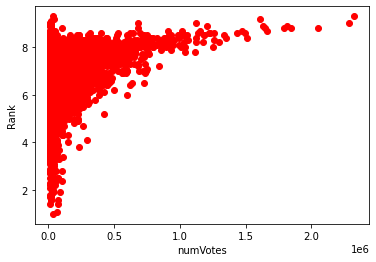

In [25]:
movies_10000 = movies[movies["numVotes"] >= 10000]
plt.scatter(movies_10000["numVotes"],movies_10000["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()

# Using Tornado templates, Draw bar graph of the number of movies by year since 1900

In [26]:
movies_since_1900 = movies[movies['startYear'] >= 1900]
movies_since_1900

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
259,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.0,39
337,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
371,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.1,610
393,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
401,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.2,11
...,...,...,...,...,...,...,...,...,...,...,...
1108120,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.2,130
1108126,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.7,771
1108129,tt9916362,movie,Coven,Akelarre,0,2020,\N,90,"Action,Adventure,Drama",5.7,177
1108132,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [27]:
movies_count = movies_since_1900.groupby(['startYear']).count()
movies_count

,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
startYear,,,,,,,,,,
1900,10,10,10,10,10,10,10,10,10,10
1901,2,2,2,2,2,2,2,2,2,2
1902,3,3,3,3,3,3,3,3,3,3
1903,11,11,11,11,11,11,11,11,11,11
1904,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...
2017,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542
2018,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291
2019,8718,8718,8718,8718,8718,8718,8718,8718,8718,8718


In [28]:
movies_count.reset_index(level = 0, inplace = True)
movies_count

,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,1900,10,10,10,10,10,10,10,10,10,10
1,1901,2,2,2,2,2,2,2,2,2,2
2,1902,3,3,3,3,3,3,3,3,3,3
3,1903,11,11,11,11,11,11,11,11,11,11
4,1904,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...
117,2017,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542
118,2018,9291,9291,9291,9291,9291,9291,9291,9291,9291,9291
119,2019,8718,8718,8718,8718,8718,8718,8718,8718,8718,8718
120,2020,5293,5293,5293,5293,5293,5293,5293,5293,5293,5293


In [29]:
def bar_graph(x, y, img, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(img, transparent=True, bbox_inches='tight')
    plt.show()
    img.seek(0)

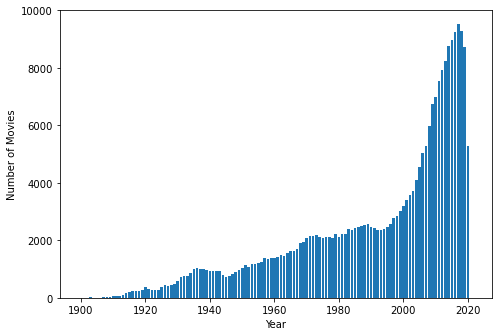

In [30]:
img = io.BytesIO()
bar_graph(movies_count['startYear'], movies_count['titleType'], img, "Year", "Number of Movies")
res = base64.b64encode(img.read()).decode("UTF-8")
with open("imdb_bargraph.html", "w") as file:
    file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(res))